In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.tree import plot_tree

In [32]:
df = pd.read_csv("Attrition.csv")

In [33]:
df.shape

(1470, 35)

In [34]:
target = df['Attrition']
df = df.drop(columns=['Attrition'])
df['Attrition'] = target

In [35]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [37]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [38]:
df.duplicated().sum()

np.int64(0)

In [39]:
for col in df.columns:
    print(f"Unique values in column '{col}':")
    print(df[col].value_counts())
    print(df[col].unique().sum())

Unique values in column 'Age':
Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
28    48
27    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
48    19
51    19
53    19
54    18
52    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64
1677
Unique values in column 'BusinessTravel':
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Travel_RarelyTravel_FrequentlyNon-Travel
Unique values in column 'DailyRate':
DailyRate
691     6
1082    5
329     5
530     5
408     5
       ..
1382    1
161     1
801     1
642     1
1154    1
Name: count, Length: 886, dtype: int64
710161
Unique values in column 'Department':
Department
Research & Development    961
Sales                     446
Human Resources            63
Nam

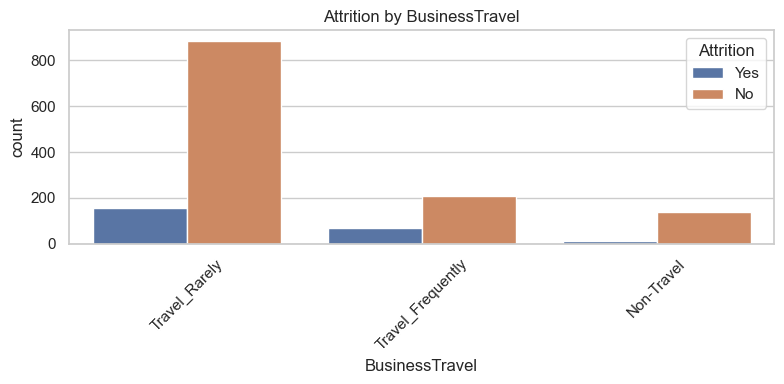

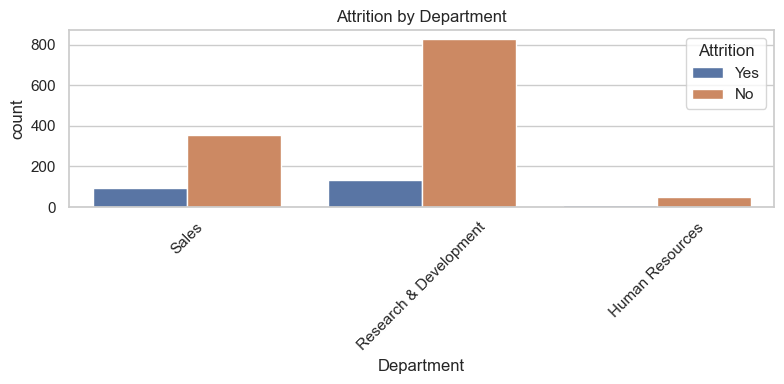

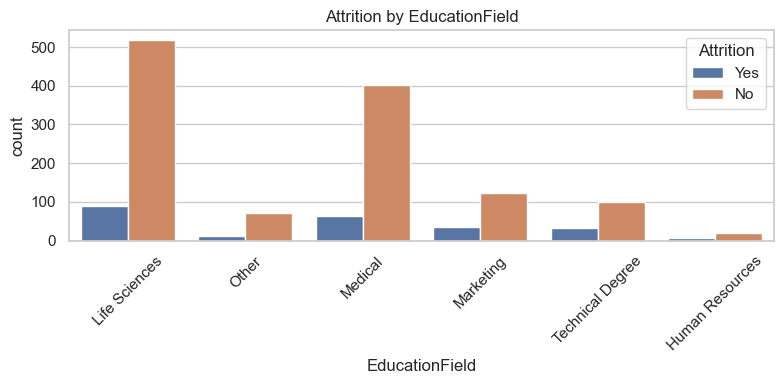

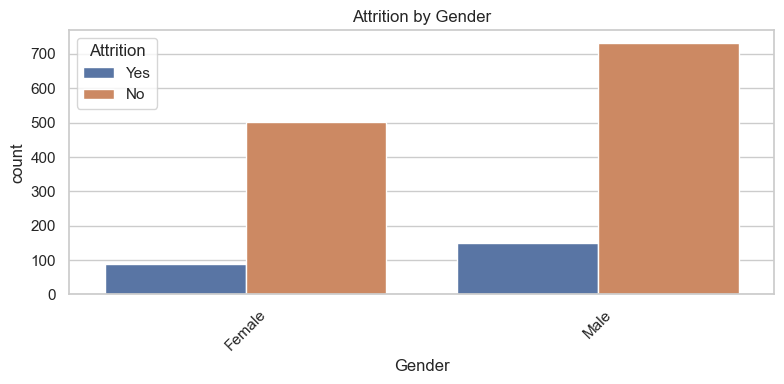

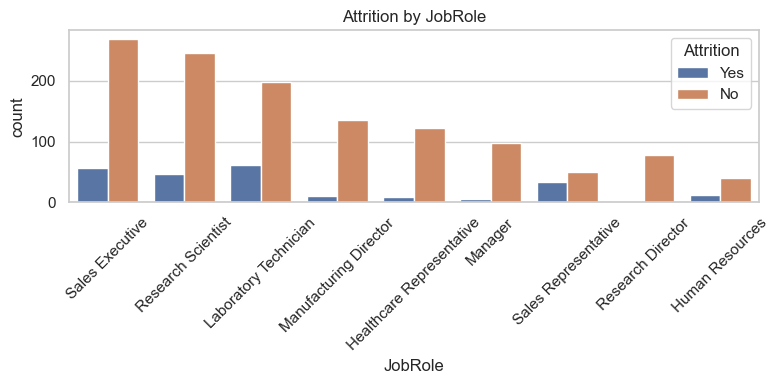

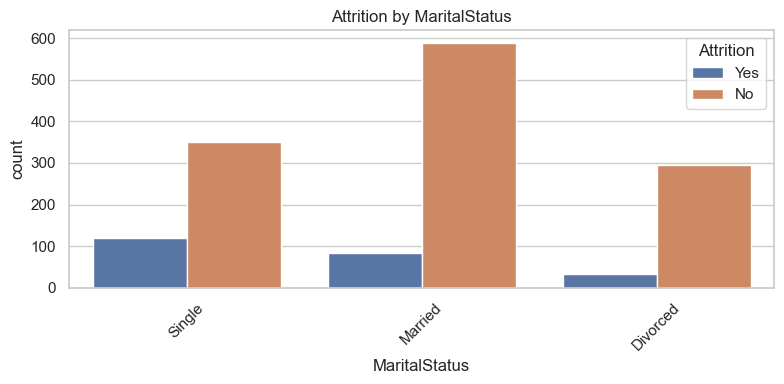

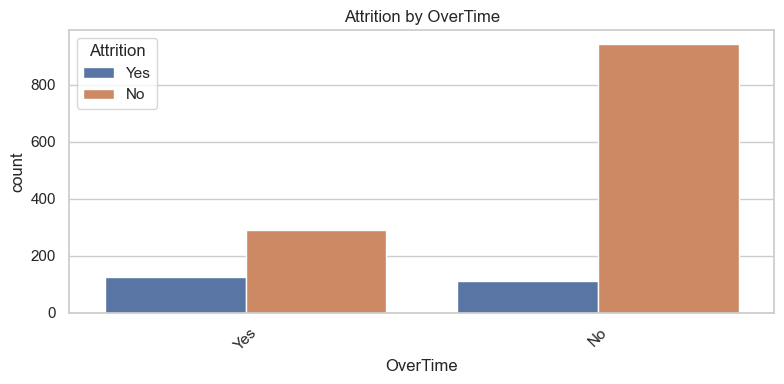

In [40]:
categorical_cols = ['BusinessTravel', 'Department', 'EducationField',
                    'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='Attrition')
    plt.title(f'Attrition by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

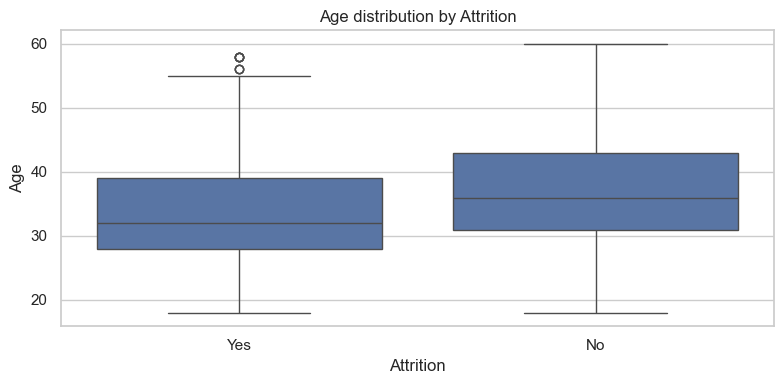

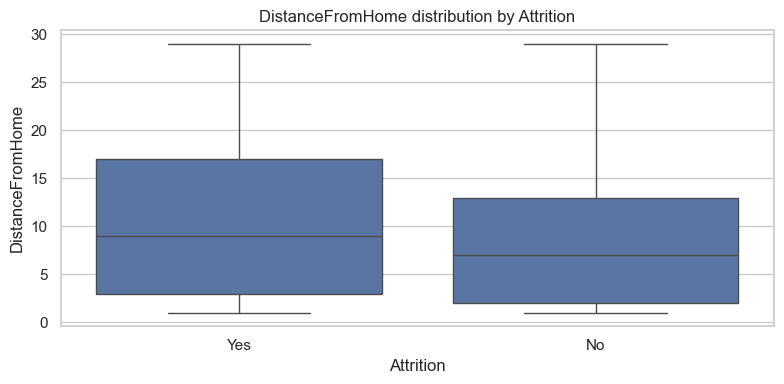

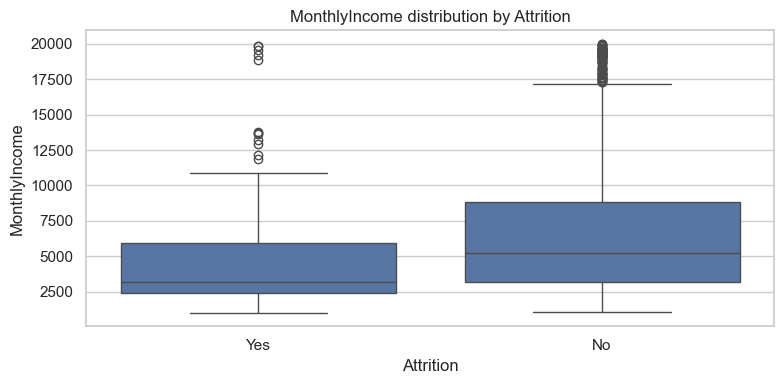

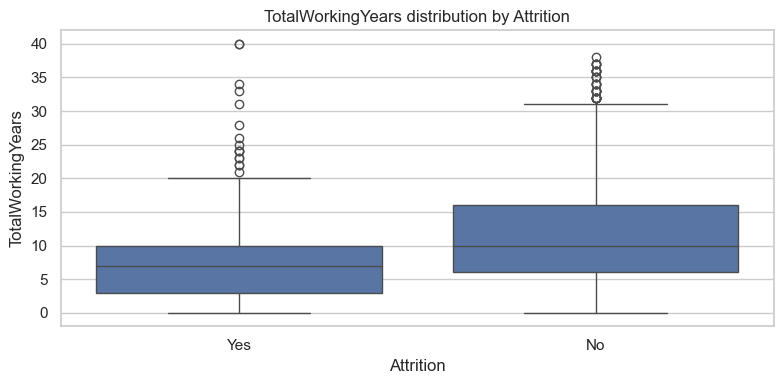

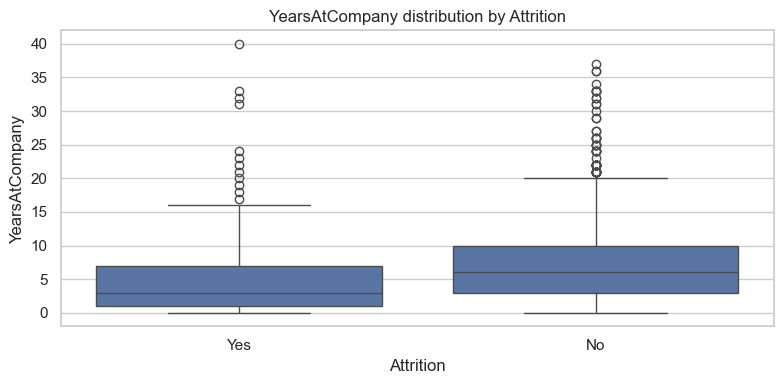

In [41]:
numerical_cols = ['Age', 'DistanceFromHome', 'MonthlyIncome',
                  'TotalWorkingYears', 'YearsAtCompany']
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x='Attrition', y=col)
    plt.title(f'{col} distribution by Attrition')
    plt.tight_layout()
    plt.show()

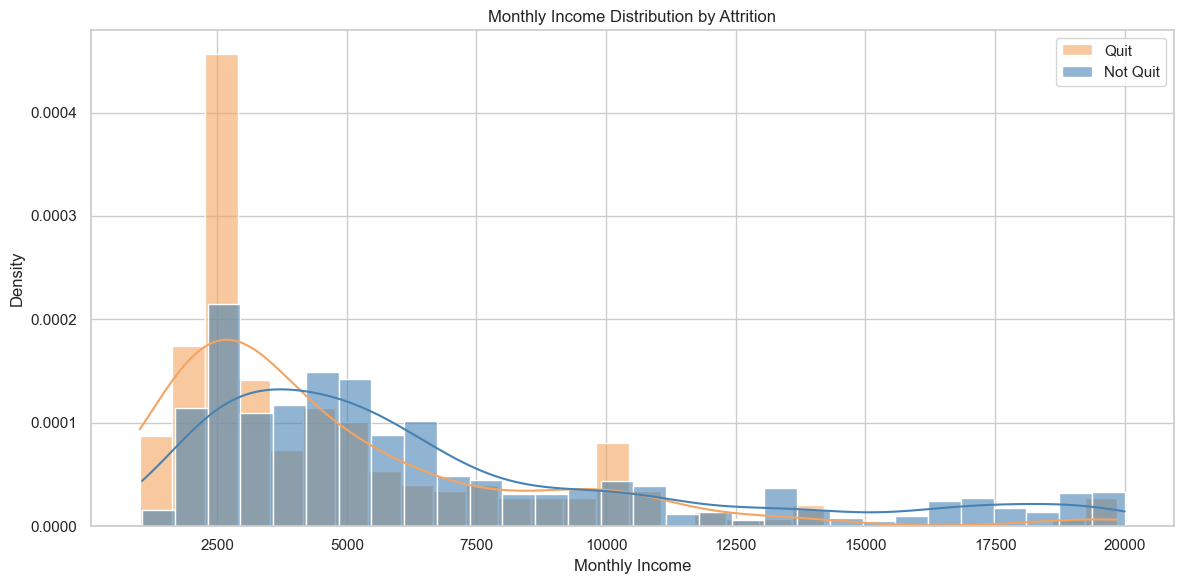

In [42]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

sns.histplot(data=df[df['Attrition'] == 'Yes'], x='MonthlyIncome',
             color='sandybrown', kde=True, stat='density', label='Quit', bins=30, alpha=0.6)
sns.histplot(data=df[df['Attrition'] == 'No'], x='MonthlyIncome',
             color='steelblue', kde=True, stat='density', label='Not Quit', bins=30, alpha=0.6)
plt.title('Monthly Income Distribution by Attrition')
plt.xlabel('Monthly Income')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

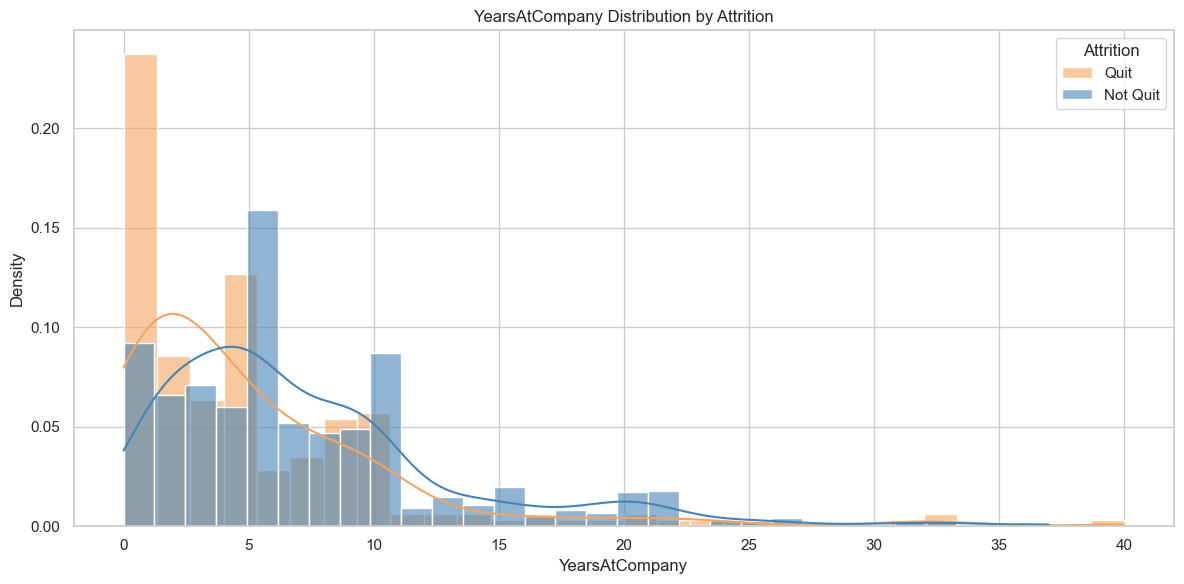

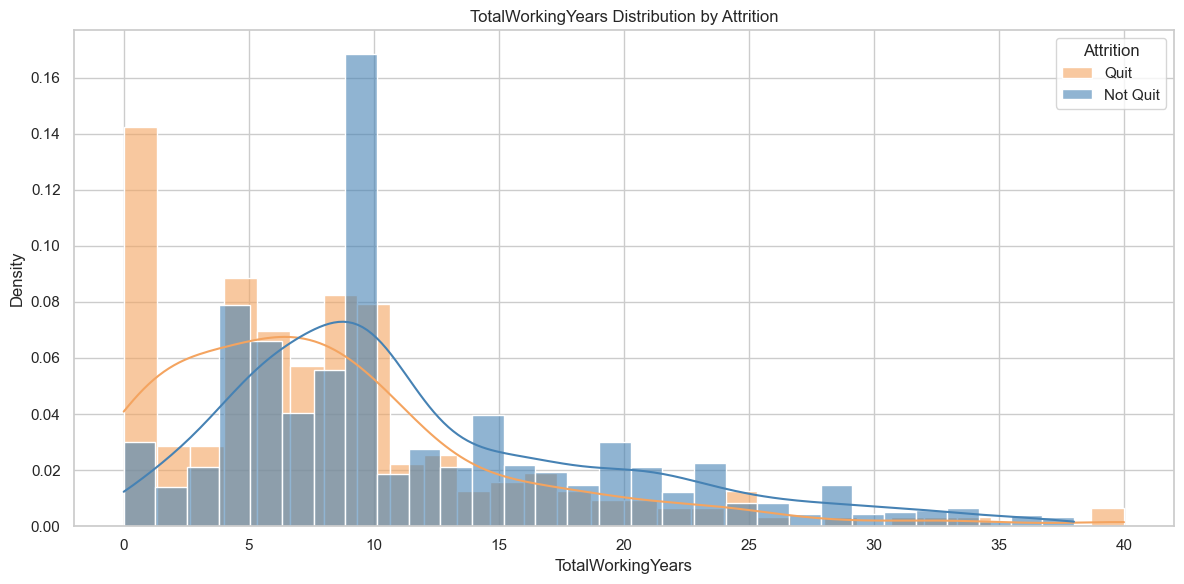

In [43]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
sns.histplot(data=df[df['Attrition']=='Yes'],x='YearsAtCompany',color='sandybrown',kde=True,stat='density',label='Quit',bins=30,alpha=0.6,common_norm=False)
sns.histplot(data=df[df['Attrition']=='No'],x='YearsAtCompany',color='steelblue',kde=True,stat='density',label='Not Quit',bins=30,alpha=0.6,common_norm=False)
plt.title('YearsAtCompany Distribution by Attrition')
plt.xlabel('YearsAtCompany')
plt.ylabel('Density')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()
plt.figure(figsize=(12,6))
sns.histplot(data=df[df['Attrition']=='Yes'],x='TotalWorkingYears',color='sandybrown',kde=True,stat='density',label='Quit',bins=30,alpha=0.6,common_norm=False)
sns.histplot(data=df[df['Attrition']=='No'],x='TotalWorkingYears',color='steelblue',kde=True,stat='density',label='Not Quit',bins=30,alpha=0.6,common_norm=False)
plt.title('TotalWorkingYears Distribution by Attrition')
plt.xlabel('TotalWorkingYears')
plt.ylabel('Density')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

In [44]:
X=df[['Age','MonthlyIncome','DistanceFromHome']]
y=df['Attrition']
f_vals,p_vals=f_classif(X,y)
for col,f,p in zip(X.columns,f_vals,p_vals):
    print(f"{col}: F={f:.2f}, p={p:.4f}")


Age: F=38.18, p=0.0000
MonthlyIncome: F=38.49, p=0.0000
DistanceFromHome: F=8.97, p=0.0028


In [46]:
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

marital_map = {'Single': 1, 'Married': 2, 'Divorced': 3}
df['MaritalStatus'] = df['MaritalStatus'].map(marital_map)

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [48]:
df = df.astype({col: 'int64' for col in df.columns if df[col].dtype == 'bool'})

In [51]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [52]:
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, random_state=42)
clf = clf.fit(X, y)

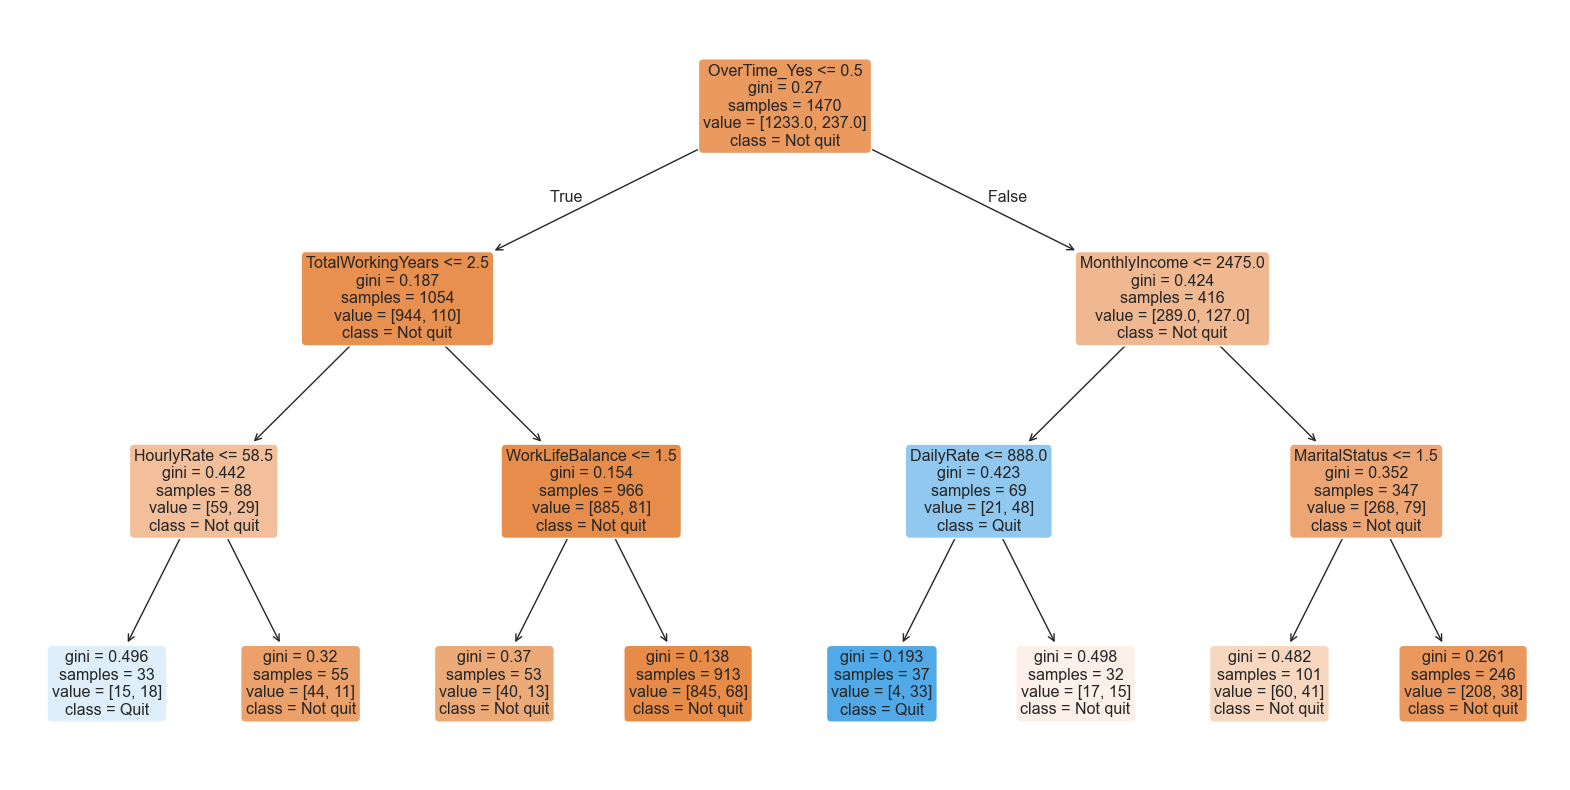

In [55]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=features, class_names=targets, filled=True, rounded=True)
plt.show()

In [56]:
importance = sorted(zip(features, clf.feature_importances_), key=lambda x: x[1], reverse=True)
for feature, val in importance:
    print(f'{feature:10s} | {val:.5f}')

MonthlyIncome | 0.30716
OverTime_Yes | 0.29342
TotalWorkingYears | 0.11864
MaritalStatus | 0.11033
DailyRate  | 0.07487
HourlyRate | 0.05998
WorkLifeBalance | 0.03561
Age        | 0.00000
DistanceFromHome | 0.00000
Education  | 0.00000
EmployeeCount | 0.00000
EmployeeNumber | 0.00000
EnvironmentSatisfaction | 0.00000
Gender     | 0.00000
JobInvolvement | 0.00000
JobLevel   | 0.00000
JobSatisfaction | 0.00000
MonthlyRate | 0.00000
NumCompaniesWorked | 0.00000
PercentSalaryHike | 0.00000
PerformanceRating | 0.00000
RelationshipSatisfaction | 0.00000
StandardHours | 0.00000
StockOptionLevel | 0.00000
TrainingTimesLastYear | 0.00000
YearsAtCompany | 0.00000
YearsInCurrentRole | 0.00000
YearsSinceLastPromotion | 0.00000
YearsWithCurrManager | 0.00000
BusinessTravel_Travel_Frequently | 0.00000
BusinessTravel_Travel_Rarely | 0.00000
Department_Research & Development | 0.00000
Department_Sales | 0.00000
EducationField_Life Sciences | 0.00000
EducationField_Marketing | 0.00000
EducationField_Me